### Numerical Integration Using Trapezoidal Rule Over Interpolated Data

We compute the definite integral of a function \( y(x) \) defined by discrete data points using the trapezoidal rule over a uniform grid.

#### Data

| $ x $   | $ y $     |
|----------|-------------|
| 0.5      | 1.255       |
| 0.387    | 1.25        |
| 0.24     | 1.189       |
| 0.136    | 1.124       |
| 0.04     | 0.783       |
| 0.011    | 0.402       |

We interpolate $ y(x) $ and integrate over the interval $ [0.03, 0.4] $ using 120 equally spaced sections.

This setup:
- Uses cubic interpolation for smoothness
- Applies trapezoidal rule over a uniform grid
- Visualizes both the data and the integrated region

In [8]:
# Load Required Librarie
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [9]:
# Define Data and Interpolated Function
# Original data
x_data = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y_data = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

# Sort data for interpolation
sorted_indices = np.argsort(x_data)
x_sorted = x_data[sorted_indices]
y_sorted = y_data[sorted_indices]

# Interpolated function (linear or cubic)
y_interp = interp1d(x_sorted, y_sorted, kind='cubic', fill_value="extrapolate")

In [10]:
# Perform Integration Over 120 Sections

# Integration interval and grid
a, b = 0.03, 0.4
x_grid = np.linspace(a, b, 120)
y_grid = y_interp(x_grid)

# Trapezoidal integration
integral = np.trapezoid(y_grid, x_grid)

# Display result
print(f"Integral of y(x) from x = {a} to x = {b} over 120 sections:")
print(f"  ∫ y(x) dx ≈ {integral:.6f}")

Integral of y(x) from x = 0.03 to x = 0.4 over 120 sections:
  ∫ y(x) dx ≈ 0.422499


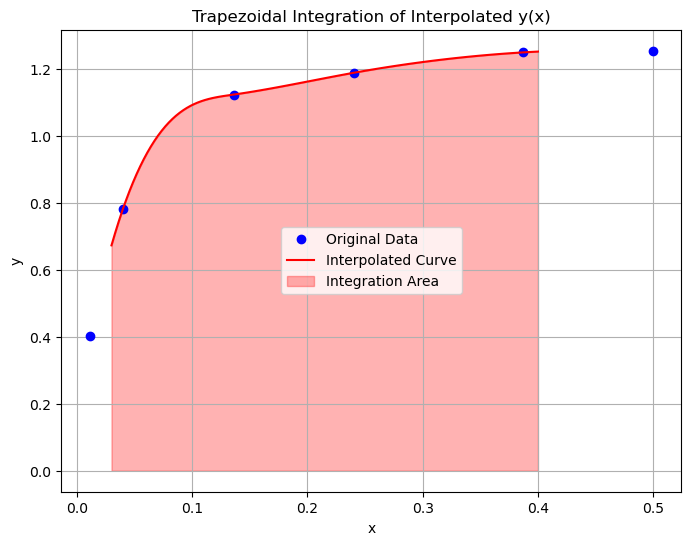

In [11]:
# Plot interpolated curve and shaded area
plt.figure(figsize=(8, 6))
plt.plot(x_sorted, y_sorted, 'bo', label='Original Data')
plt.plot(x_grid, y_grid, 'r-', label='Interpolated Curve')
plt.fill_between(x_grid, 0, y_grid, color='red', alpha=0.3, label='Integration Area')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trapezoidal Integration of Interpolated y(x)')
plt.grid(True)
plt.legend()
plt.show()